In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
d=pd.read_csv("/content/drive/MyDrive/Dataset/Copy of diabetes.csv")

In [3]:
d.shape

(768, 9)

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# check first rows
d.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# count outcome classes
d["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [12]:
# separate X and y
X = d.drop("Outcome", axis=1)
y = d["Outcome"]

In [13]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# scale data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# svm model
svm = SVC(kernel="rbf")

# train
svm.fit(X_train, y_train)

SVC()

In [16]:
# predict
y_pred = svm.predict(X_test)

In [17]:
# accuracy
accuracy_score(y_test, y_pred)

0.7337662337662337

In [18]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[82, 17],
       [24, 31]])

In [20]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



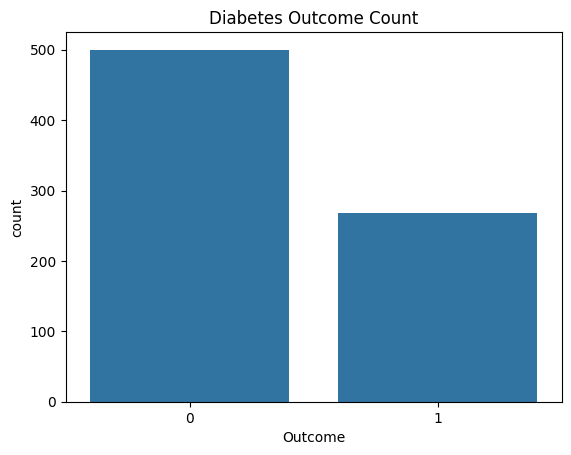

In [22]:
# target distribution (Shows class balance (diabetic vs non-diabetic))
sns.countplot(x="Outcome", data=d)
plt.title("Diabetes Outcome Count")
plt.show()

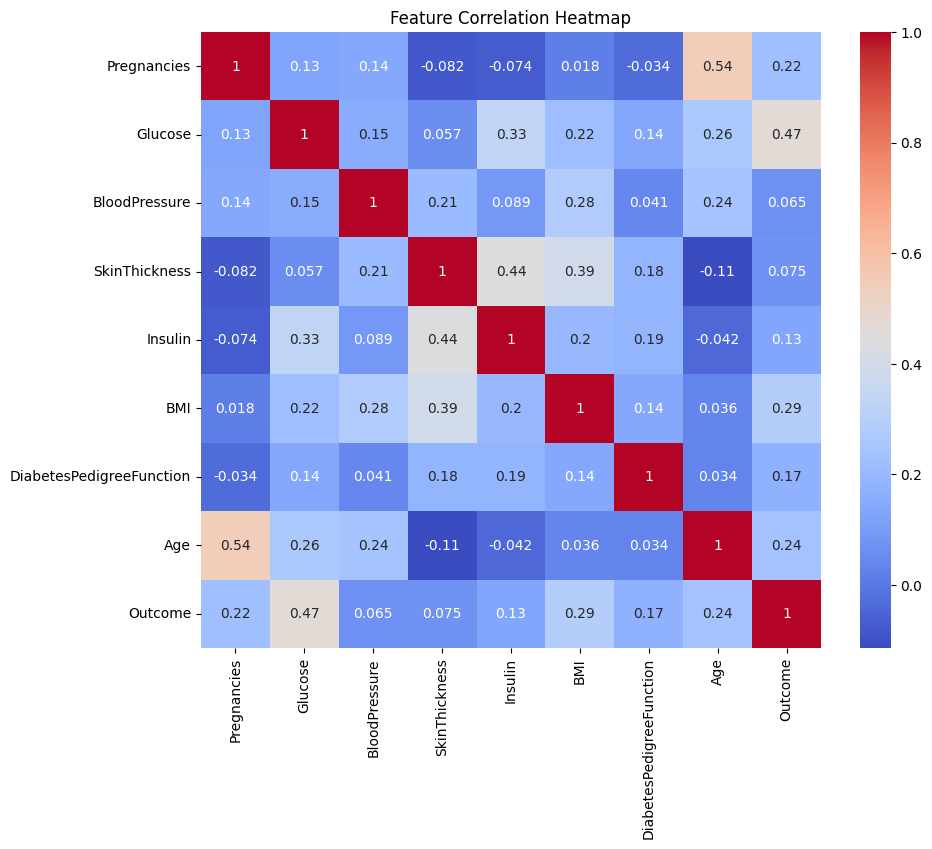

In [23]:
# correlation (explain feature relationships)
plt.figure(figsize=(10,8))
sns.heatmap(d.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

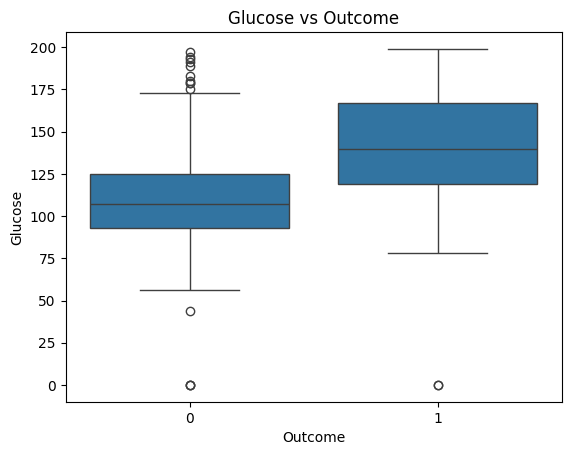

In [25]:
# Glucose vs Outcome (Shows diabetics have higher glucose)
sns.boxplot(x="Outcome", y="Glucose", data=d)
plt.title("Glucose vs Outcome")
plt.show()

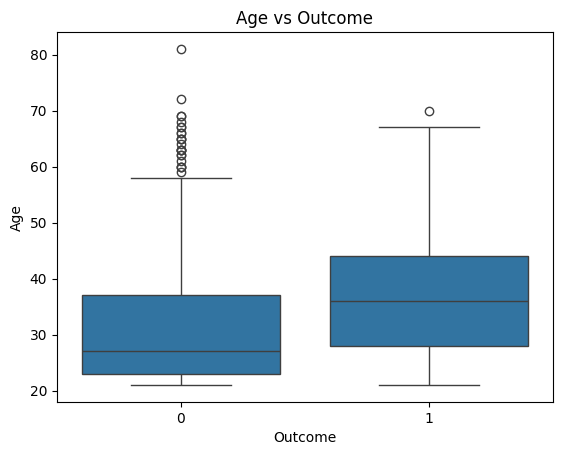

In [26]:
# age (Age vs Outcome) analysis
sns.boxplot(x="Outcome", y="Age", data=d)
plt.title("Age vs Outcome")
plt.show()

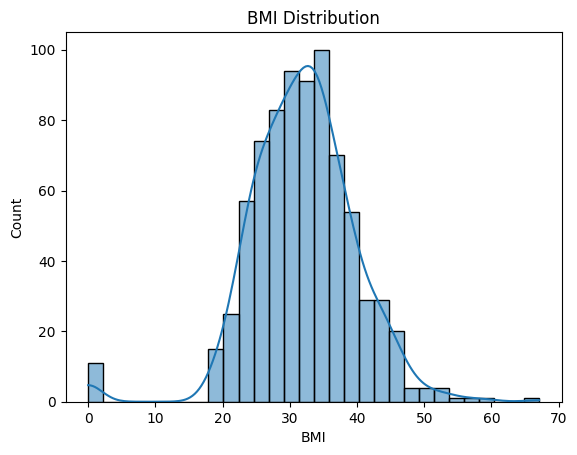

In [27]:
# bmi distribution
sns.histplot(d["BMI"], bins=30, kde=True)
plt.title("BMI Distribution")
plt.show()

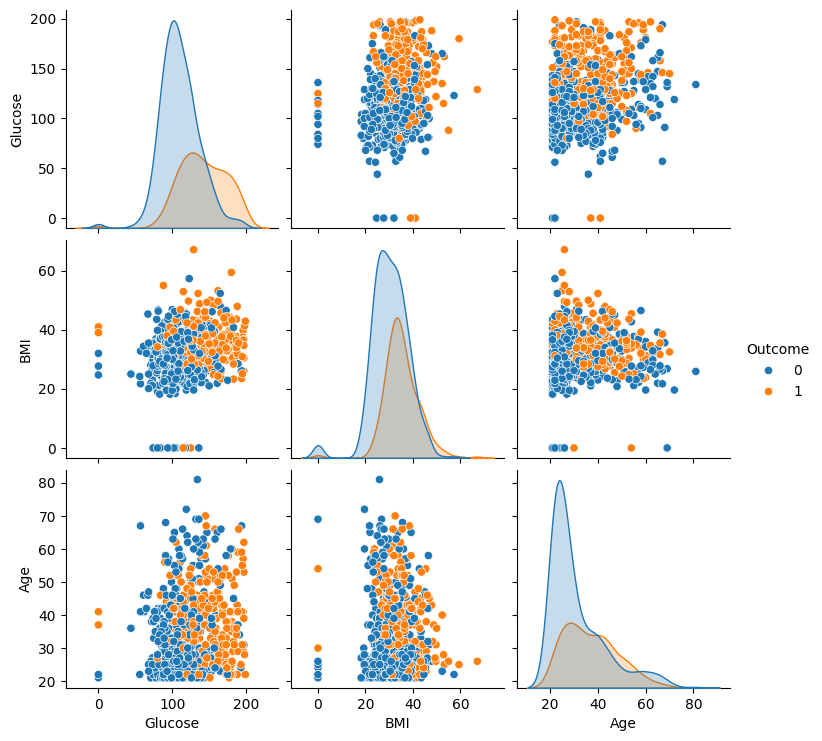

In [28]:
# pair plot
sns.pairplot(d[["Glucose", "BMI", "Age", "Outcome"]], hue="Outcome")
plt.show()